In [2]:
library("tidyverse")
library("ranger")
library("Amelia")
library("caret")
library("pROC")
library("diversityForest")
library("Metrics")
data_agri <- read.csv("Final_Data_01.csv",sep=';')
data_econ <-read_csv("econ_data_new_2.csv")
clusters_econ<-read_csv("econ_cluster.csv")

data_econ = data_econ[data_econ$sector=='A',]
data_agri = data_agri[data_agri$sector=='A',]

data_final_01<-merge(x = data_agri, y = data_econ, by = c("geo","year"), all.x = TRUE)

data_final_01<-merge(x = data_final_01, y = clusters_econ, by = c("geo"), all.x = TRUE)

cluster_climate_variables<-read_csv("cluster_climate_variables.csv")

cluster_climate_variables <- cluster_climate_variables %>% select(-c('...1'))

data_final_01<-merge(x = data_final_01, y = cluster_climate_variables, by = c("geo"), all.x = TRUE)

vars_to_drop<-c('X','geo','sector.x','sector.y','gdp.x',
                'gdp.y','country','share','gva','gva_emp',
'gva_emp_gr','area.y','gva_area','empl','gva_area_gr','GVA','gva_area_log_diff','gva_emp_log_diff','gva_gr','gva_log_diff',
                'country','share','gdp.y','cluster_C')

data_final_01 <- data_final_01 %>% select(-vars_to_drop)

data_final_01 <- data_final_01 %>% filter(is.finite(gva__gr))


data_final_01 <- drop_na(data_final_01)
data_final_01 <- data_final_01[data_final_01$year!=2018,]

#train_set <- data_final_01[data_final_01$year!=2017,]
#validation_set <-data_final_01[data_final_01$year==2017,]

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects a

In [11]:
write.csv(data_final_01,'data_A_sector.csv')

In [3]:
data_final_01$year<-NULL

In [4]:
## train the model
model_df_agriculture <- interactionfor(dependent.variable.name = "gva__gr", 
                           data = data_final_01, max.depth=10,
num.trees = 2500, seed=36)

Growing trees.. Progress: 44%. Estimated remaining time: 40 seconds.
Growing trees.. Progress: 84%. Estimated remaining time: 11 seconds.
Computing EIM values.. Progress: 4%. Estimated remaining time: 12 minutes, 47 seconds.
Computing EIM values.. Progress: 8%. Estimated remaining time: 11 minutes, 34 seconds.
Computing EIM values.. Progress: 13%. Estimated remaining time: 10 minutes, 56 seconds.
Computing EIM values.. Progress: 17%. Estimated remaining time: 10 minutes, 15 seconds.
Computing EIM values.. Progress: 21%. Estimated remaining time: 9 minutes, 43 seconds.
Computing EIM values.. Progress: 25%. Estimated remaining time: 9 minutes, 9 seconds.
Computing EIM values.. Progress: 30%. Estimated remaining time: 8 minutes, 36 seconds.
Computing EIM values.. Progress: 34%. Estimated remaining time: 8 minutes, 9 seconds.
Computing EIM values.. Progress: 38%. Estimated remaining time: 7 minutes, 37 seconds.
Computing EIM values.. Progress: 42%. Estimated remaining time: 7 minutes, 6 se

Press [enter] for next plot. 


(Unadjusted) p-value: p = 0.00840286057472898 
(Unadjusted) p-value: p = 6.5719348933122e-24 


Press [enter] for next plot. 


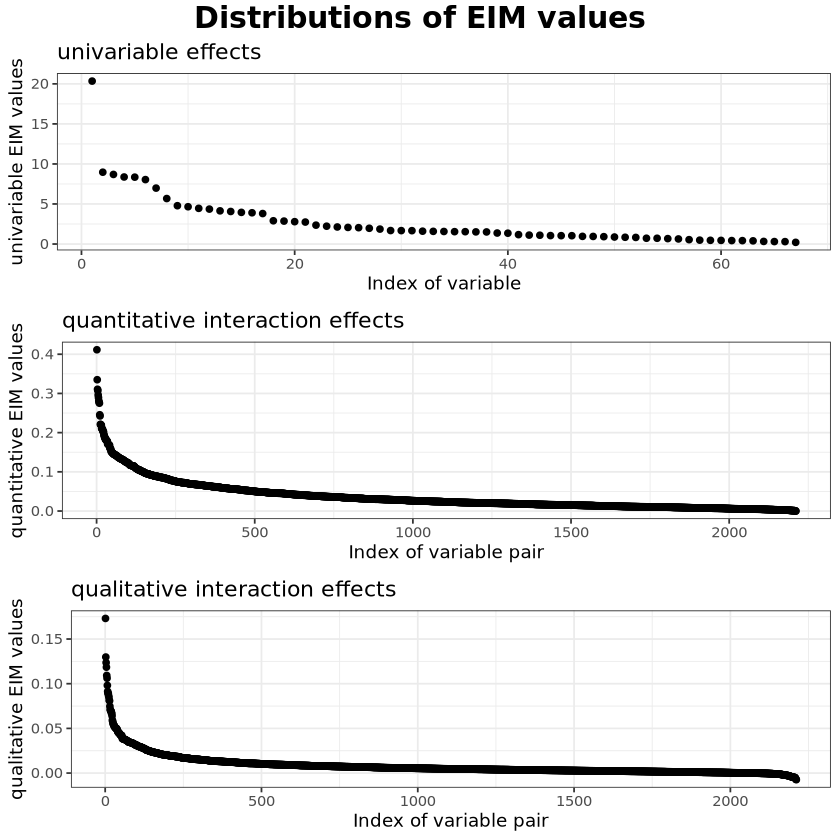

(Unadjusted) p-value: p = 3.90530778154223e-32 
(Unadjusted) p-value: p = 0.00152975728632524 


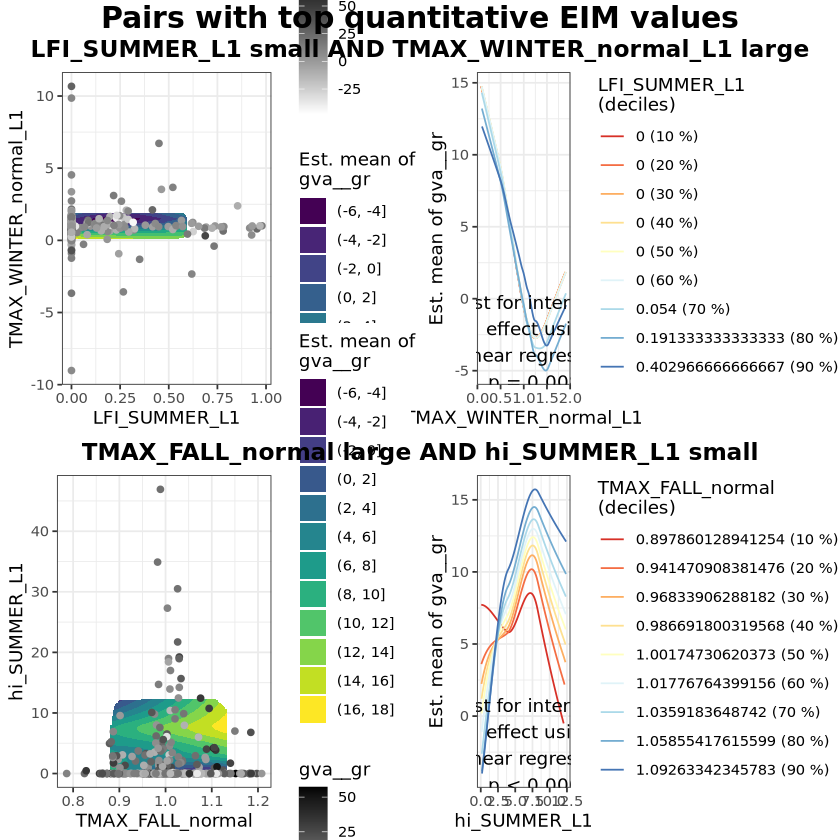

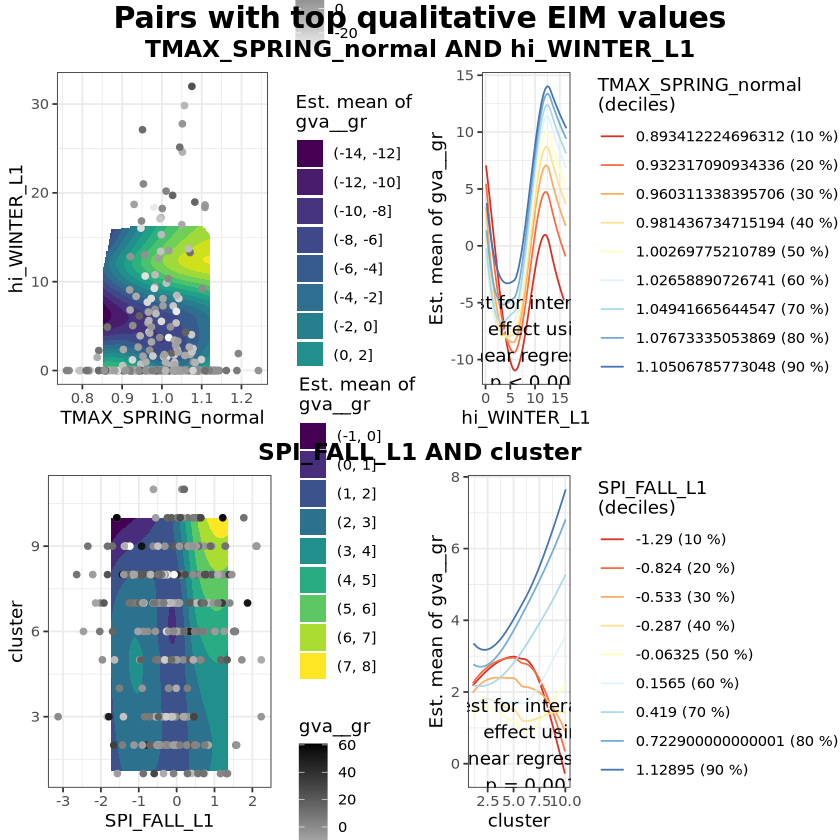

In [5]:
plot(model_df_agriculture)

In [15]:
model_df_agriculture$eim.univ.sorted[0:10]


TMAX_WINTER_normal_L1            hi_FALL_L1          hi_SUMMER_L1 
            20.346515              8.968513              8.689752 
         hi_WINTER_L1      TMAX_FALL_normal               hi_FALL 
             8.370678              8.351354              8.045752 
TMAX_SUMMER_normal_L1    TMAX_SPRING_normal    TMAX_SUMMER_normal 
             6.982726              5.679449              4.784767 
        Nearby_SMA_L1 
             4.655498

In [16]:
model_df_agriculture$eim.quant.sorted[0:10]

LFI_SUMMER_L1 small AND TMAX_WINTER_normal_L1 large 
                                          0.4114427 
      TMAX_FALL_normal large AND hi_SUMMER_L1 small 
                                          0.3350072 
    hi_WINTER small AND TMAX_WINTER_normal_L1 large 
                                          0.3106404 
   hi_FALL_L1 small AND TMAX_WINTER_normal_L1 large 
                                          0.3070326 
 hi_SUMMER_L1 small AND TMAX_WINTER_normal_L1 large 
                                          0.2961322 
   employment small AND TMAX_WINTER_normal_L1 large 
                                          0.2893715 
 hi_WINTER_L1 small AND TMAX_WINTER_normal_L1 small 
                                          0.2811415 
LFI_SPRING_L1 small AND TMAX_WINTER_normal_L1 small 
                                          0.2773370 
   LFI_SUMMER small AND TMAX_WINTER_normal_L1 small 
                                          0.2750512 
SPI_WINTER_L1 small AND TMAX_WINTER_normal_L1 large 
                                          0.2456277

In [17]:
model_df_agriculture$eim.qual.sorted[0:10]

TMAX_SPRING_normal AND hi_WINTER_L1 
                                   0.17305897 
                      SPI_FALL_L1 AND cluster 
                                   0.12986632 
           TMAX_FALL_normal AND Nearby_SPI_L1 
                                   0.12362550 
TMAX_FALL_normal_L1 AND TMAX_SPRING_normal_L1 
                                   0.11848559 
                         hi_WINTER_L1 AND LON 
                                   0.10928171 
          hi_SUMMER AND TMAX_SUMMER_normal_L1 
                                   0.10615330 
      SPI_WINTER_L1 AND TMAX_SUMMER_normal_L1 
                                   0.09813523 
     TMAX_FALL_normal AND TMAX_FALL_normal_L1 
                                   0.09139657 
                  TMAX_FALL AND LFI_SPRING_L1 
                                   0.08919729 
          TMAX_WINTER AND TMAX_FALL_normal_L1 
                                   0.08901423

In [41]:
### prediction with the new data on year 2018 and 2021
### since our models predict current year with current variables
## we cannot predict 2022 

data_to_predict<- read.csv('Final_Data_With_New_Years.csv',sep=';')

data_to_predict<-data_to_predict[data_to_predict$sector=='A',]

unique(data_to_predict$year)

## predict years 2018 and 2021
data_to_predict <- data_to_predict[data_to_predict$year %in% c(2018,2021),]

data_econ <- read.csv('econ_data_full.csv')


data_to_predict<-merge(x = data_to_predict, y = data_econ, by = c("geo","year"), all.x = TRUE)

data_to_predict<-merge(x = data_to_predict, y = clusters_econ, by = c("geo"), all.x = TRUE)
data_to_predict<-merge(x = data_to_predict, y = cluster_climate_variables, by = c("geo"), all.x = TRUE)

vars_to_drop<-c('X','sector.x','sector.y','gdp.x',
                'gdp.y','country','gva','gva_emp_gr','gva_emp',
'empl','GVA',
                'country','gdp.y','cluster_C')

data_to_predict <- data_to_predict %>% select(-vars_to_drop)


data_to_predict <- data_to_predict %>% rename('area.x'='area')

data_to_predict<-drop_na(data_to_predict)
years<-data_to_predict$year
geo<-data_to_predict$geo

data_to_predict$year<-NULL

data_to_predict$geo<-NULL

predictions <- predict(model_df_agriculture,data_to_predict)$predictions

plot(predictions,
     data_to_predict$gva__gr)

print(paste('The rmse on the growth rate of the GVA in the agricultural sector in 2018 and 2021 is',rmse(predictions,
     data_to_predict$gva__gr),'ppt'))

data_to_predict$prediction=predictions

data_to_predict$year=years
data_to_predict$geo=geo

In [45]:
data_to_predict

area.x employment population LFI_WINTER LFI_SPRING LFI_SUMMER LFI_FALL 
1     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
2     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
3     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
4     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
5     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
6     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
7     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
8     1792   4.4        158.38     0          0.09633333 0.0000000  0.0000000
9     1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
10    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
11    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
12    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
13    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
14    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
15    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
16    1471   2.2         97.03     0          0.00000000 0.0000000  0.0000000
17    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
18    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
19    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
20    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
21    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
22    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
23    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
24    3356   8.6        246.30     0          0.20266667 0.2243333  0.4546667
25    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
26    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
27    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
28    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
29    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
30    3368   4.5        260.00     0          0.00000000 0.0000000  0.0000000
⋮     ⋮      ⋮          ⋮          ⋮          ⋮          ⋮          ⋮        
12124 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12125 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12126 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12127 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12128 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12129 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12130 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12131 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12132 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12133 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12134 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12135 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12136 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12137 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12138 8973   11.34      824.23     0.3223333  0.5636667  0.26733333 0.8006667
12139 6754    8.86      799.60     0.2966667  0.4893333  0.06933333 0.7720000
12140 6754    8.86      799.60     0.2966667  0.4893333  0.06933333 0.7720000
12141 6754    8.86      799.60     0.2966667  0.4893333  0.06933333 0.7720000
12142 6754    8.86      799.60     0.2966667  0.4893333  0.06933333 0.7720000
12143 6754    8.86      799.

In [49]:
data_final_prediction<-data_to_predict%>%select(c('geo','year','gva__gr','prediction'))

write.csv(data_final_prediction,'predictions_agri.csv')